In [2]:
import re
import pickle
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YongLe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YongLe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Only for submission to Kaggle to see scores
# df = pd.read_csv('test.csv')
# df = df[['id', 'text']]
# STOPWORDS = set(nltk.corpus.stopwords.words('english'))
# df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
# df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
# df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
# df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# df['char_count'] = df['text'].apply(lambda x: len(str(x)))
# df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
# df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
# df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# # Do a brief cleaning of the data
# df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
# df['text'] = [x.lower() for x in df['text']] # lowercase 

# # Load the model stacking_model.sav
# model = pickle.load(open('stacking_model_2.sav', 'rb'))

# # Make predictions
# predictions = model.predict(df)

# # Save the predictions to a csv file
# df = pd.DataFrame({'id': df['id'], 'target': predictions})
# df.to_csv('submission_2.csv', index=False) # Retrained model is 0.1 weaker than the first one

In [4]:
# Load the data from tweets.json
df = pd.read_json('tweets.json', lines=True)

# Print the first 5 rows of data
df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/JtrOmar/status/16231076774...,2023-02-07 23:53:20+00:00,No tientes! https://t.co/UD3YSYis3j,No tientes! https://t.co/UD3YSYis3j,1623107677483159552,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,7.0,NaN,No tientes! https://t.co/UD3YSYis3j,[],,[],,JtrOmar
1,snscrape.modules.twitter.Tweet,https://twitter.com/LastQuake/status/162310355...,2023-02-07 23:36:57+00:00,‼ No further info about this #earthquake will ...,‼ No further info about this #earthquake will ...,1623103555031769089,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,3713.0,NaN,‼ No further info about this #earthquake will ...,[https://www.emsc-csem.org/service/application...,https://www.emsc-csem.org/service/application/...,"[https://t.co/LBaVNedgF9, https://t.co/z6tAk3S...",https://t.co/LBaVNedgF9 https://t.co/z6tAk3SAC...,LastQuake
2,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16231014105...,2023-02-07 23:28:26+00:00,@luz_marcha Good night 🙏❤️,@luz_marcha Good night 🙏❤️,1623101410559643649,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,9.0,NaN,@luz_marcha Good night 🙏❤️,[],,[],,biket_a
3,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16231013208...,2023-02-07 23:28:05+00:00,@ChrisHowley6 Clever girl 😂,@ChrisHowley6 Clever girl 😂,1623101320864342016,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,NaN,None,17.0,NaN,@ChrisHowley6 Clever girl 😂,[],,[],,biket_a
4,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16231010354...,2023-02-07 23:26:57+00:00,"@FlirtyFlightB2 Beautiful,,😘","@FlirtyFlightB2 Beautiful,,😘",1623101035496501251,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,None,19.0,NaN,"@FlirtyFlightB2 Beautiful,,😘",[],,[],,biket_a


In [5]:
# Keep only date and renderedContent columns
df = df[['date', 'renderedContent']]
df.columns = ['date', 'text']
df.head()

,date,text
0,2023-02-07 23:53:20+00:00,No tientes! https://t.co/UD3YSYis3j
1,2023-02-07 23:36:57+00:00,‼ No further info about this #earthquake will ...
2,2023-02-07 23:28:26+00:00,@luz_marcha Good night 🙏❤️
3,2023-02-07 23:28:05+00:00,@ChrisHowley6 Clever girl 😂
4,2023-02-07 23:26:57+00:00,"@FlirtyFlightB2 Beautiful,,😘"


In [6]:
# Create meta features from text
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# Do a brief cleaning of the data
df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
df['text'] = [x.lower() for x in df['text']] # lowercase 
df.head()


,date,text,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,url_count,hashtag_count,mention_count
0,2023-02-07 23:53:20+00:00,no tientes! https://t.co/ud3ysyis3j,3,3,1,11.000000,35,6,1,0,0
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will ...,17,17,7,8.647059,163,16,0,1,0
2,2023-02-07 23:28:26+00:00,@luz_marcha good night 🙏❤️,4,4,0,5.750000,26,2,0,0,1
3,2023-02-07 23:28:05+00:00,@chrishowley6 clever girl 😂,4,4,0,6.000000,27,1,0,0,1
4,2023-02-07 23:26:57+00:00,"@flirtyflightb2 beautiful,,😘",2,2,0,13.500000,28,3,0,0,1


In [7]:
# Load the model stacking_model.sav
model = pickle.load(open('stacking_model.sav', 'rb'))

In [8]:
# Define X
meta_features = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length', 'char_count', 'punctuation_count', 'url_count', 'hashtag_count', 'mention_count']
X = df[['text'] + meta_features]

# Predict positive or negative label
y_pred = model.predict(X)

# Add the prediction to the dataframe
df['prediction'] = y_pred

# Print the first 5 rows of the dataframe
df.head()

,date,text,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,url_count,hashtag_count,mention_count,prediction
0,2023-02-07 23:53:20+00:00,no tientes! https://t.co/ud3ysyis3j,3,3,1,11.000000,35,6,1,0,0,0
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will ...,17,17,7,8.647059,163,16,0,1,0,1
2,2023-02-07 23:28:26+00:00,@luz_marcha good night 🙏❤️,4,4,0,5.750000,26,2,0,0,1,0
3,2023-02-07 23:28:05+00:00,@chrishowley6 clever girl 😂,4,4,0,6.000000,27,1,0,0,1,0
4,2023-02-07 23:26:57+00:00,"@flirtyflightb2 beautiful,,😘",2,2,0,13.500000,28,3,0,0,1,0


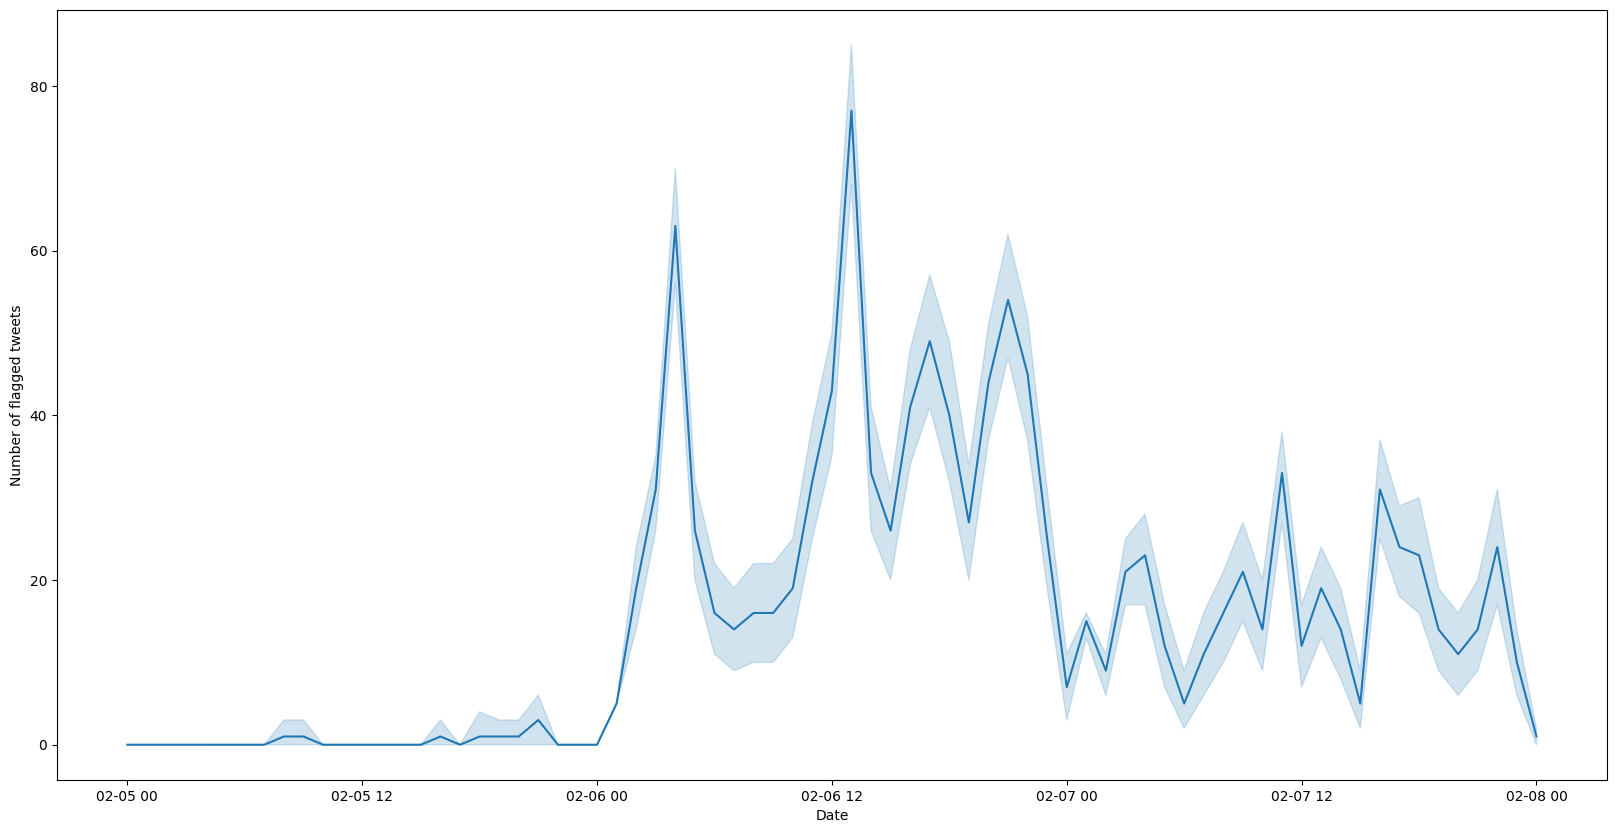

In [9]:
# Plot the predictions over time by hour
df['date'] = pd.to_datetime(df['date'])
df['date_hour'] = df['date'].dt.round('H')

# Plot a smooth line of the sum of positive predictions with seaborn
plt.figure(figsize=(20,10))
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum)

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')
plt.show()


In [10]:
# Priority tweets with predict proba
df['prediction_proba'] = model.predict_proba(X)[:,1]
# Priority are those above 0.9

df['priority'] = df['prediction_proba'].apply(lambda x: 1 if x > 0.9 else 0)

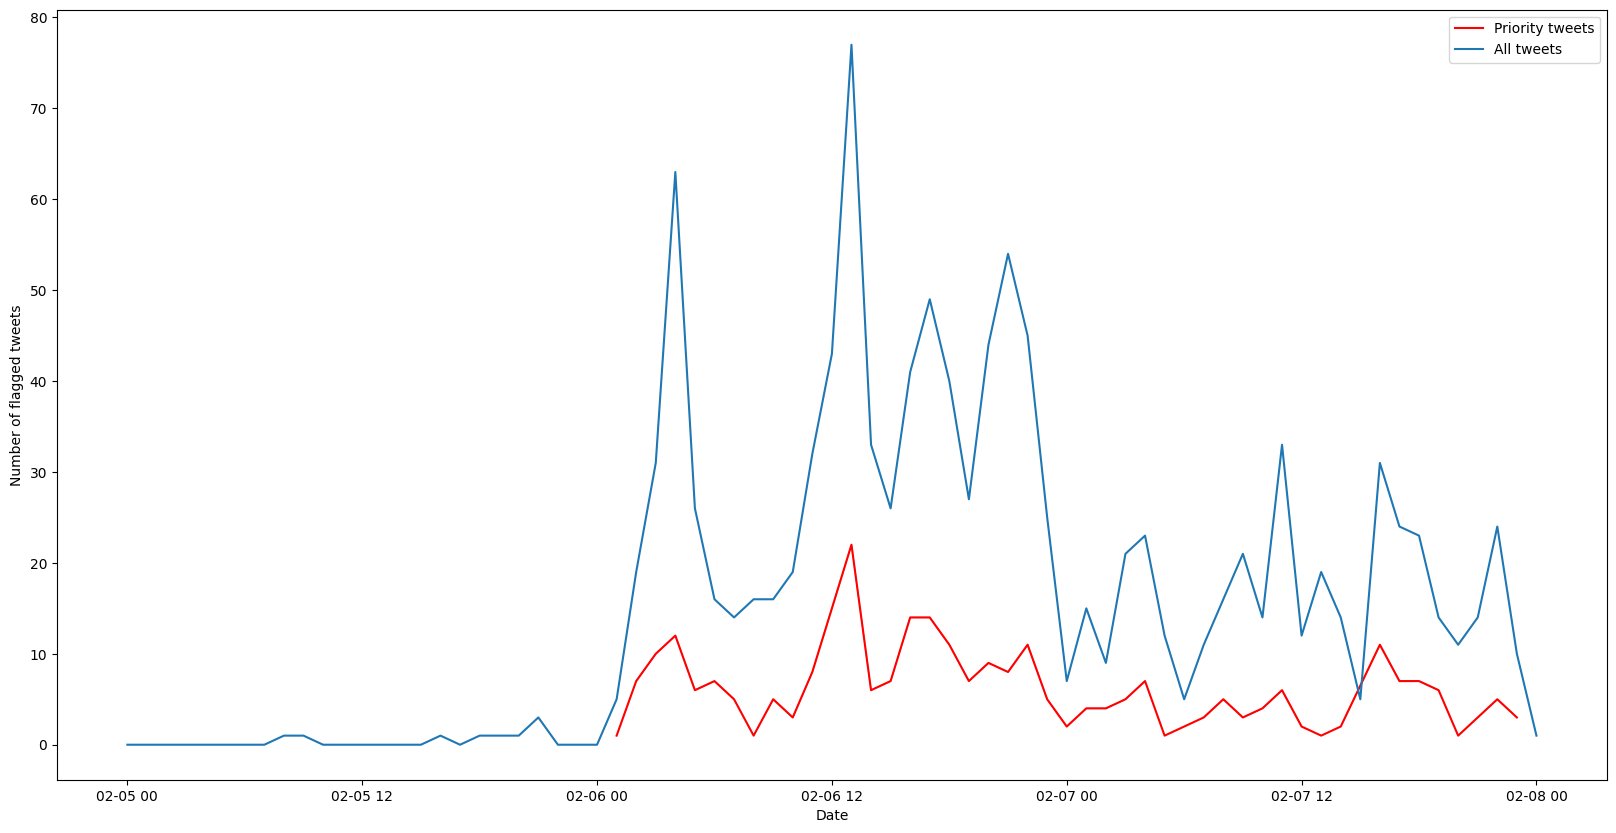

In [11]:
# Plot the same seaborn but with priority tweets 
plt.figure(figsize=(20,10))
sns.lineplot(x='date_hour', y='priority', data=df[df['priority'] == 1], estimator=sum, color='red', label='Priority tweets')
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum, errorbar=None, label='All tweets')
plt.legend()

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')

plt.show()

In [17]:
# Use Plotly Go
import plotly.graph_objects as go

df2 = df.groupby('date_hour').agg({'prediction': 'sum', 'priority': 'sum'}).reset_index()
df2['priority'] = df2['priority'].apply(lambda x: np.nan if x == 0 else x)

# Create a figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['date_hour'], y=df2['prediction'], mode='lines+markers', name='All tweets'))
fig.add_trace(go.Scatter(x=df2['date_hour'], y=df2['priority'], mode='lines+markers', name='Priority tweets'))
fig.update_layout(title='Number of flagged tweets over time',
                     xaxis_title='Date',
                        yaxis_title='Number of flagged tweets')
fig.update_traces(hovertemplate='Date: %{x}<br>Number of flagged tweets: %{y}')
fig.show()



In [13]:
# Show the earliest 5 priority tweets without the meta_features
df[df['priority'] == 1].drop(meta_features+['date_hour','priority','prediction'], axis=1).sort_values('date').head()

,date,text,prediction_proba
1860,2023-02-06 01:18:56+00:00,❗ deprem uyarisi / earthquake warning for turk...,0.916574
1848,2023-02-06 01:46:04+00:00,"usgs reports a m6.7 earthquake, central turkey...",0.930768
1843,2023-02-06 01:57:45+00:00,#earthquake 28 km nw of #doğanca (#turkey) 40 ...,0.927528
1837,2023-02-06 02:04:37+00:00,🚨#breaking: powerful 7.8 magnitude earthquake ...,0.965471
1834,2023-02-06 02:15:44+00:00,🔔#earthquake (#deprem) m6.4 occurred 15 km n o...,0.906952
